# Announcements - Monday, October 23

* Download ALL files for today's lecture
* This lecture is the exact same place I got to last semester
  * Don't worry we're not behind schedule
  * Lecture notebooks are arranged by topic
  * Some topics take longer than others
* If you have questions, it is almost always faster to 
  * Post on Piazza
  * Go to [office hours](https://sites.google.com/wisc.edu/cs220-oh-f23/home?pli=1) 
### Conflict Form
  * [Exam 2 - November 8, 5:45 pm](https://cs220.cs.wisc.edu/f23/surveys.html)
  * [Final - December 19, 7:45 am](https://cs220.cs.wisc.edu/f23/surveys.html)

# Objects, References, and Tuples

In [ ]:
# import statements
from collections import namedtuple

### Review 1: What is the type of: {}
1. set
2. dict

### Review 2: If S is a string and L is a list, which line definitely fails?
1. S[-1] = "."
2. L[len(S)] = S

In [ ]:
# Scenario 1: length of S is less than length of L
# This would work.
S = "abcde"
print(len(S))
L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
L[len(S)] = S
L

In [ ]:
#Scenario 2: length of S is greater than length of L
# This wouldn't work!
S = "abcdefghijklmnopqrstuvwxyz"
print(len(S))
L = [1, 2, 3, 4, 5]
L[len(S)] = S

### Review 3: Which type is immutable?
1. str
2. list
3. dict

### Learning objectives:
- Explain the difference between objects and references, and stack and heap.
    - primitive data types (int, float, str, bool) are objects in Python
- Understand new mental model for state (v2)
    - incorporates objects and references
- Determine the side effects that occur when modifying parameters.
- Use tuples to store immutable sequences of values.
- creating custom types (syntax, purpose - to store user-defined data objects):
    - namedtuple (immutable)

## Objects vs references

Observations:
- objects have a "life of their own" beyond variables or even function frames
- here there are dict and list objects (others are possible)
- references show up two places: as variables and values in data structures
- all primitive values (int, str, float, bool) are objects too in Python

<div>
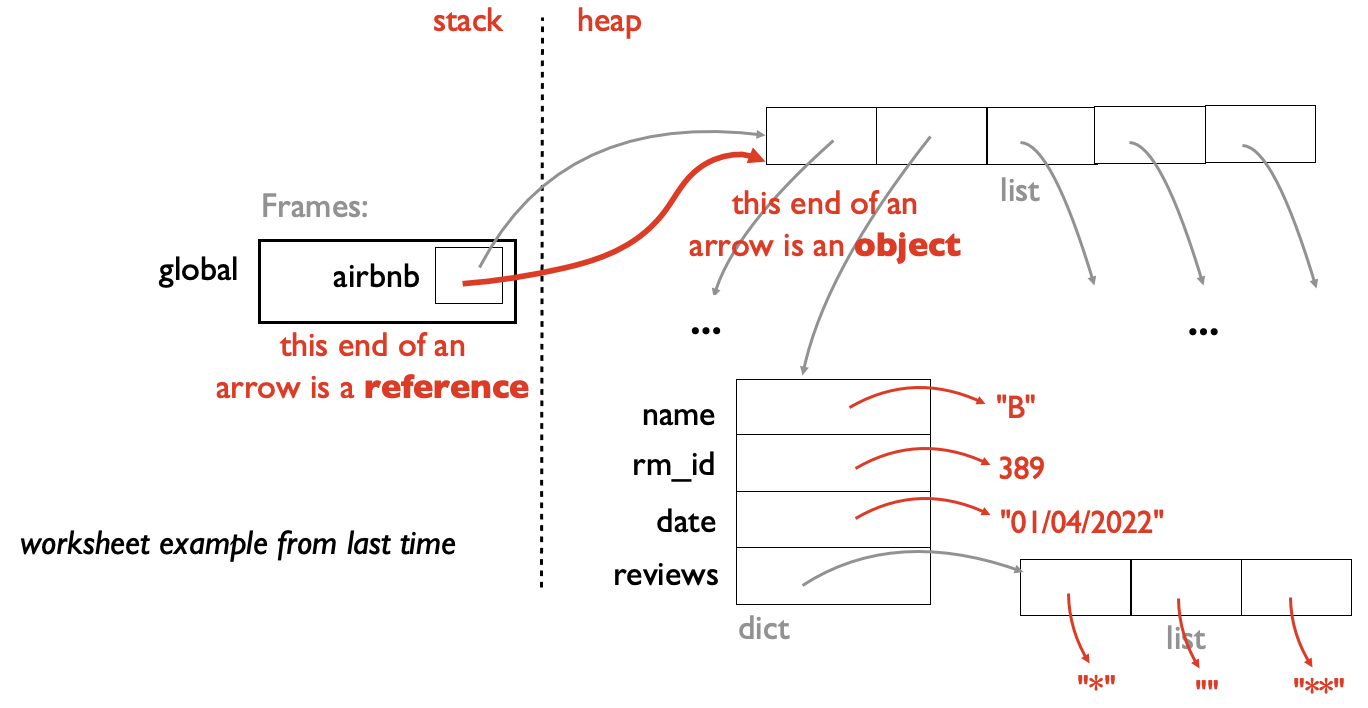
</div>

Questions:
- why do we need this more complicated model?
- how can we create new types of objects?
- how can we compare objects and references?
- how can we copy objects to create new objects?

## Determine the side effects that occur when modifying parameters.

- Rule 1: during variable assignment, new variable references whatever is being referenced by the variable on the RHS.
- Rule 2: parameters reference whatever is being referenced by the argument variables.

### Copy the examples below into Python Tutor and trace the code

In [ ]:
# Example 1: Reassigning parameters
def f(x):
    x *= 3
    print("f:", x)

num = 10
f(num)
print("after:", num)

In [ ]:
# Example 2: Modifying a list
def f(items):
    items.append("!!!")
    print("f:", items)

words = ['hello', 'world']
f(words)
print("after:", words)

In [ ]:
# Example 3: Reassign new list
def f(items):
    items = items + ["!!!"]
    print("f:", items)

words = ['hello', 'world']
f(words)
print("after:", words)

In [ ]:
# Example 4: in-place sort
def first(items):
    return items[0]

def smallest(items):
    items.sort()
    return items[0]

numbers	= [4,5,3,2,1]
print("first:", first(numbers))
print("smallest:", smallest(numbers))
print("first:", first(numbers))

In [ ]:
# Example 5: sorted sort
def first(items):
    return items[0]

def smallest(items):
    items = sorted(items)
    return items[0]

numbers	= [4,5,3,2,1]
print("first:", first(numbers))
print("smallest:", smallest(numbers))
print("first:", first(numbers))

In summary, write one good thing and bad thing about lists being mutable

In [ ]:
# good thing - flexibility to change the list object directly from inside a function
# bad thing - accidental list object modification! What if you don't want anyone to
#             modify your list object?

## Tuple data structure
- immutable version of lists

<div>
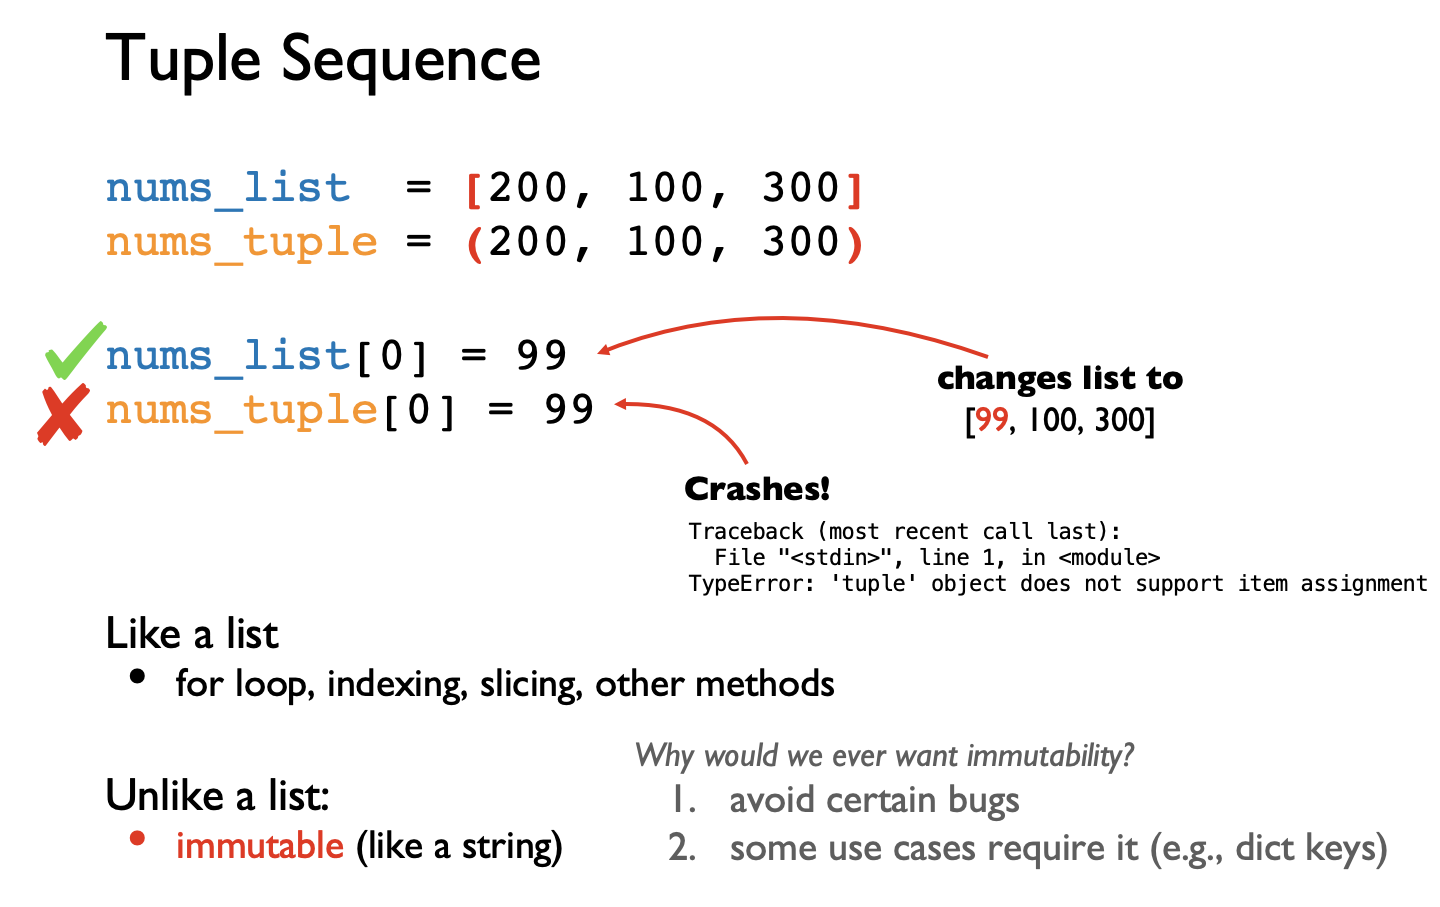
</div>

In [ ]:
scores = [32, 55, 72, 91]   # a list is a mutable sequence
scores[-1] = 100

print(scores)

In [ ]:
some_tuple = (7, 4, -3) # a tuple is an immutable sequence

# Indexing
print("First val is:", some_tuple[0])

# Slicing
print("Subset tuple is:", some_tuple[1:3])

# For loop
for val in some_tuple:
    print(val)
    
# Cannot mutate
some_tuple[2] = 4 # TypeError

In [ ]:
# Can tuples be sorted? TODO: discuss with your neighbor.

some_tuple.sort() # AttributeError

In [ ]:
# What about using sorted function?
print(some_tuple)

new_list = sorted(some_tuple)
print(new_list)

### What are the key features of tuples?

In [ ]:
# 1. immutable
# 2. indexing
# 3. slicing
# 4. for loops

#### (1+2) ---> is this a tuple or specifying operator precedence?

#### So how do we create a tuple of size 1 (1+2,)?

### Usecase for tuples:
1. storing immutable data, for example: student netid or campus ID
2. can be used as dictionary keys (recall that we cannot use lists as dictionary keys)

In [ ]:
# Fails with TypeError
buildings = {
    [0,0]: "Comp Sci",
    [0,2]: "Psychology",
    [4,0]: "Noland",
    [1,8]: "Van Vleck" }

In [ ]:
# Works with tuple as keys
buildings = {
    (0,0): "Comp Sci",
    (0,2): "Psychology",
    (4,0): "Noland",
    (1,8): "Van Vleck" }
buildings

#### Reference:  https://www.w3schools.com/python/python_tuples.asp

## Custom types

### Can you spot the bug - v1?

In [ ]:
people = [
  {"Fname": "Alice", "lname": "Anderson", "age": 30},
  {"fname": "Bob", "lname": "Baker", "age": 31},
]
p = people[0]
print("Hello " + p["fname"] + " " + p["lname"])

### What is the fix - v1?

### Can you spot the bug - v2?

In [ ]:
people = [
  ("Alice", "Anderson", 30),
  ("Bob", "Baker", 31),
]
p = people[1]
print("Hello " + p[1] + " " + p[2])

### What is the fix - v2?

## namedtuple

- need to import using: from collections import	 namedtuple

<div>
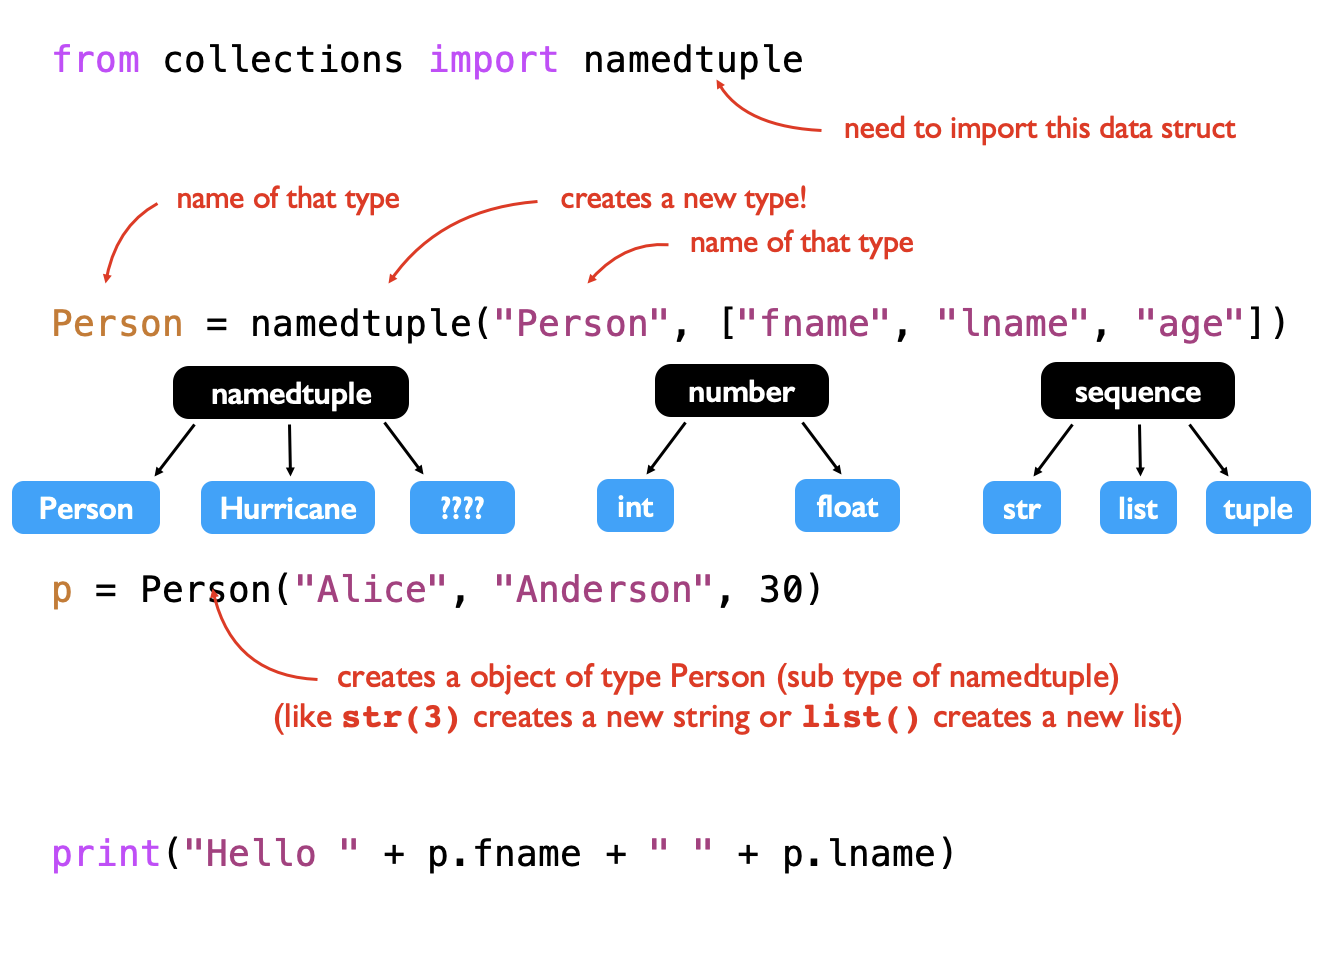
</div>

In [ ]:
# Create custom type
Person = namedtuple("Person", ["fname", "lname", "age"])

# Create object instance of custom type
p1 = Person("Alice", "Anderson", 30)                       # positional arguments
p2 = Person(age = 30, fname = "Alice", lname = "Anderson") # keyword arguments
# Create another Person object
p3 = Person("Peter", "Parker", 30)

# Access attributes of custom type
print("Hello " + p1.fname + " " + p1.lname)

In [ ]:
# make a list of Persons


In [ ]:
# print out people
print(people, end = "\n\n\n")

# say hello to each person


In [ ]:
# write a function to find the average age of the Persons in people
# Practice

def avg_age(p_list):
    """
    computes average age for a list of Person objects
    """ 
    pass

avg_age(people)

### What are the key features of namedtuples?

In [ ]:
# 1. immutable
# 2. creates custom types

#### Self-check: create Student custom type with name, lecture, major, age, and pizza_topping

#### If you were successful then the cell below should run without errors

In [ ]:
# \ helps to split a long line into two lines of code
some_student = Student(name = "Cindy", lecture = "LEC001", major = "Computer Science", \
                       age = 18, pizza_topping = "pineapple")

print(str(some_student.age) + " year old student named " + some_student.name + \
      " is taking CS220/CS319 " + some_student.lecture + ", majoring in " + \
      some_student.major + ". They like " + some_student.pizza_topping + \
      " on their pizza.")